<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v3:</b>
    
<b>Overall Feedback</b> 
    
Hi Miguel, thank you for going an extra mile and improving your projects. 
- There is a no issues left, so your project has been accepted.   
- Wish you cool projects in the next sprints! ☘️
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  
    
Another great self-paced course that covers basic concepts in probability and statistics - Probability and Statistics by Stanford Online or you could check this one [An Introduction to Statistical Learning with Applications in R](https://www.r-bloggers.com/2014/09/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/) 🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

Project description

Telecom operator Megaline, delivery data set of customer performance of 2018.
Those five data sets recorded the information of the client, the number call and duration on time, the messages when they were sent and the internet.

the company offer two plans, and add extra charge if the client used more resources the define in the plan.

the goal is evaluate this information and find the best approach base in revenue.

the plan is used python libraries to analysis the data.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

## Initialization

Python Libraries:
    - **pandas** data manipulation and analysis
    - **numpy** high-level mathematical functions.
    - **scipy** used for scientific computing and technical computing
    - **matlabplotlib** is a plotting library 

In [1]:
# Loading all the libraries
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Load data

load each dataset to the dataframe with no additional parameter required, because those are standard files.

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')




## Prepare the data

In [3]:
# show the first 5 rows dor each dataframe
display('megaline_calls',df_calls[:5])
display('megaline_internet',df_internet[:5])
display('megaline_messages',df_messages[:5])
display('megaline_plans',df_plans[:5])
display('megaline_users',df_users[:5])



'megaline_calls'

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


'megaline_internet'

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


'megaline_messages'

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


'megaline_plans'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


'megaline_users'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


All dataset were loading to Dataframe completed, and columns name are consistence lowecas and without spaces.

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [4]:
# Print the general/summary information about the plans' DataFrame

df_plans.info()
print('\n number rows duplicates:', df_plans.duplicated().sum())
print('\n number missing values: ',df_plans.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

 number rows duplicates: 0

 number missing values:  messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [5]:
# Print a sample of data for plans
display(df_plans.sample(2))


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]
the df_plans dataframe contein two row with parameter values for each plan surf and ultimate describe in the column 'plan_name' all information are consistency and complete.

## Fix data

[Fix obvious issues with the data given the initial observations.]

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
df_users.info()
print('\n number rows duplicates:', df_users[df_users.duplicated()])
print('\n number rows duplicates: ', df_users[['first_name','last_name']].duplicated().sum())
print('\n number missing values: ',df_users.isna().sum() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

 number rows duplicates: Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []

 number rows duplicates:  0

 number missing values:  user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [7]:
# Print a sample of data for users
display(df_users.sample(10))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
260,1260,Alia,Aguilar,36,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-02,surf,NaN
305,1305,Gwenn,Gross,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-05-08,surf,NaN
120,1120,Abraham,Mcconnell,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-03,surf,NaN
42,1042,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,NaN
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN
122,1122,Lashay,Reese,57,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-04,surf,NaN
338,1338,Janise,Bowman,21,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-09,surf,NaN
398,1398,German,Thompson,30,"Denver-Aurora-Lakewood, CO MSA",2018-10-22,surf,NaN
274,1274,Dudley,Massey,53,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-10,ultimate,NaN
317,1317,Ruthanne,Heath,70,"Phoenix-Mesa-Chandler, AZ MSA",2018-11-11,ultimate,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

User dataset include all information completed, the column ‘churn_data’ where filled with 34 users because indicated the date when client closed the service. 8 columns this ‘object’ data type. This information will be key because content information about plans for each user, the address.

## Calls

In [8]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()
print('\n number rows duplicates:', df_calls.duplicated().sum())
print('\n number missing values: ',df_calls.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

 number rows duplicates: 0

 number missing values:  id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [9]:
# Print a sample of data for calls
display(df_calls.head(10))
# rounded up: even if the call lasted just one second
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype(int)
display(df_calls.head(10))

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
5,1000_388,1000,2018-12-31,3
6,1000_510,1000,2018-12-27,6
7,1000_521,1000,2018-12-28,15
8,1000_530,1000,2018-12-28,6
9,1000_544,1000,2018-12-26,5


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

no duplicated rows were found, no missing data found, all information 
looked completed and consistent.
The date information was loading as the object dtype needed to convert to datetime format.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [10]:
# convert dtype from object to datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
# display first and last day in df_calls dataframe
print(df_calls['call_date'].min(),df_calls['call_date'].max())

2018-01-15 00:00:00 2018-12-31 00:00:00


use pd.to_datetime to set datetime format 'call_date' column.

also verigy the range of date information.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [11]:
# add column with month from full data
df_calls['month'] = df_calls['call_date'].dt.month
display(df_calls.sample(10))

,id,user_id,call_date,duration,month
12276,1053_626,1053,2018-12-29,0,12
128781,1464_197,1464,2018-11-24,5,11
113984,1400_326,1400,2018-10-09,9,10
52844,1190_20,1190,2018-12-26,13,12
62018,1223_182,1223,2018-10-26,0,10
88586,1324_642,1324,2018-09-22,13,9
19990,1076_480,1076,2018-12-25,7,12
114890,1402_136,1402,2018-12-24,5,12
11864,1052_83,1052,2018-12-30,0,12
108133,1382_1260,1382,2018-10-27,2,10


Add 'month' column to dataframe extracting from 'call_date'

## Messages

In [12]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()
print('\n number rows duplicates:', df_messages.duplicated().sum())
print('\n number missing values: ',df_messages.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

 number rows duplicates: 0

 number missing values:  id              0
user_id         0
message_date    0
dtype: int64


In [13]:
# Print a sample of data for messages
display(df_messages.sample(10))


,id,user_id,message_date
13669,1090_178,1090,2018-05-25
60555,1382_93,1382,2018-07-09
45938,1313_134,1313,2018-11-12
16067,1107_125,1107,2018-12-18
22593,1133_873,1133,2018-11-08
21843,1132_1351,1132,2018-12-25
1190,1011_153,1011,2018-11-24
58562,1372_34,1372,2018-12-25
9479,1069_554,1069,2018-12-19
21159,1132_382,1132,2018-07-11


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Message dataframe:
	76051 rows and 3 columns, Dtype object and integer values, no rows duplicated were found. No missing values were found. However the ‘message_data’ need to convert to datetime Dtype.


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [14]:
# convert dtype from object to datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
# display first and last day in df_messages dataframe
print(df_messages['message_date'].min(),df_messages['message_date'].max())

2018-01-15 00:00:00 2018-12-31 00:00:00


use pd.to_datetime to set datetime format 'message_date' column.

also verigy the range of date information.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [15]:
# add column with month from full data
df_messages['month'] = df_messages['message_date'].dt.month
display(df_messages.sample(10))

,id,user_id,message_date,month
68898,1446_85,1446,2018-09-25,9
19564,1126_283,1126,2018-07-24,7
69829,1454_191,1454,2018-11-28,11
52387,1336_364,1336,2018-04-24,4
49126,1328_84,1328,2018-12-15,12
48456,1324_1193,1324,2018-10-15,10
58868,1374_42,1374,2018-06-17,6
25618,1154_201,1154,2018-12-19,12
52440,1336_429,1336,2018-07-12,7
29997,1188_15,1188,2018-11-20,11


Add 'month' column to dataframe extracting from 'call_date'

## Internet

In [16]:
# Print the general/summary information about the internet DataFrame
df_internet.info()
print('\n number rows duplicates:', df_internet.duplicated().sum())
print('\n number missing values: ',df_internet.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

 number rows duplicates: 0

 number missing values:  id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [17]:
# Print a sample of data for the internet traffic
display(df_internet.sample(10))
# rounded up: even if the call lasted just one second
df_internet['gb_used'] = df_internet['mb_used'].div(1024).apply(np.ceil).astype(int)
display(df_internet.head(10))

,id,user_id,session_date,mb_used
65864,1305_27,1305,2018-11-16,466.27
18216,1081_285,1081,2018-11-13,1031.74
90335,1416_65,1416,2018-12-25,124.39
45596,1202_146,1202,2018-11-11,812.54
5001,1028_577,1028,2018-08-10,609.56
17872,1080_203,1080,2018-08-25,392.01
39668,1178_457,1178,2018-12-19,538.85
51691,1232_261,1232,2018-09-29,343.84
73980,1347_75,1347,2018-10-01,170.70
47889,1214_263,1214,2018-04-27,30.26


,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,1
1,1000_204,1000,2018-12-31,0.00,0
2,1000_379,1000,2018-12-28,660.40,1
3,1000_413,1000,2018-12-26,270.99,1
4,1000_442,1000,2018-12-27,880.22,1
5,1001_0,1001,2018-08-24,284.68,1
6,1001_3,1001,2018-12-09,656.04,1
7,1001_4,1001,2018-11-04,16.97,1
8,1001_10,1001,2018-11-27,135.18,1
9,1001_15,1001,2018-12-13,761.92,1


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Internet dataframe total rows 104825 no duplicated and missing data were found similar case as call and message the session date needed to convert dtype datetime.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
# convert dtype from object to datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
# display first and last day in df_internet dataframe
print(df_internet['session_date'].min(),df_internet['session_date'].max())

2018-01-15 00:00:00 2018-12-31 00:00:00


the column 'session_date' were update with dtype datetime
and range of date were display.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [19]:
# add column with month from session_date
df_internet['month'] = df_internet['session_date'].dt.month
display(df_internet.sample(10))

,id,user_id,session_date,mb_used,gb_used,month
84246,1392_214,1392,2018-09-06,55.81,1,9
7733,1041_573,1041,2018-11-12,47.22,1,11
93039,1434_276,1434,2018-07-06,664.63,1,7
26982,1125_30,1125,2018-12-31,569.87,1,12
49066,1220_72,1220,2018-07-18,519.80,1,7
87268,1404_135,1404,2018-11-22,310.64,1,11
98622,1466_103,1466,2018-12-15,626.73,1,12
13296,1062_266,1062,2018-05-15,580.32,1,5
43090,1191_269,1191,2018-09-09,476.08,1,9
54976,1249_182,1249,2018-06-14,0.00,0,6


'month' column were added to dataframe.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>

👏


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [20]:
# Print out the plan conditions and make sure they are clear for you
display(df_plans)
#df_plans.pivot_table(index='usd_monthly_pay',columns='plan_name', values=['minutes_included','messages_included'])
print('Plan Include')
pivotinclude = pd.pivot_table(df_plans,columns=['plan_name','usd_monthly_pay'],values=['minutes_included','messages_included', 'mb_per_month_included'])
display(pivotinclude)
print('Plan No Include')
pivotNOinclude = pd.pivot_table(df_plans,columns=['plan_name'],values=['usd_per_gb', 'usd_per_message', 'usd_per_minute'])
display(pivotNOinclude)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Plan Include


plan_name,surf,ultimate
usd_monthly_pay,20,70
mb_per_month_included,15360,30720
messages_included,50,1000
minutes_included,500,3000


Plan No Include


plan_name,surf,ultimate
usd_per_gb,10.00,7.00
usd_per_message,0.03,0.01
usd_per_minute,0.03,0.01


below describe from dataframe df_plans the rates agremment for each plan. 

Surf
    Monthly charge: $20
    500 monthly minutes, 50 texts, and 15 GB of data
    After exceeding the package limits:
        1 minute: 3 cents
        1 text message: 3 cents
        1 GB of data: $10
Ultimate
    Monthly charge: $70
    3000 monthly minutes, 1000 text messages, and 30 GB of data
    After exceeding the package limits:
        1 minute: 1 cent
        1 text message: 1 cent
        1 GB of data: $7


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you've checked all data frames. 

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [21]:
# Calculate the number of calls made by each user per month. Save the result.
display(df_calls[:4])
number_calls = df_calls.groupby(['user_id','month'], as_index=False)['id'].count()
print('Number calls made each user by month \n', number_calls.sample(10))


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12


Number calls made each user by month 
       user_id  month  id
1419     1316      8  41
728      1156      8  62
887      1189      9  13
299      1066      4  57
271      1061      9  80
1410     1313     11  89
941      1201      9  57
1856     1405      6  14
228      1054      9  41
1369     1302     11  70


split the dataframe calls by user and month count the number calls, the number call by user is in the collum 'id'

In [22]:
# Calculate the amount of minutes spent by each user per month. Save the result.
number_calls = df_calls.groupby(['user_id','month'], as_index=False)['duration'].sum()
print('amount of minutes spent by each user per month \n', number_calls.head(10))
print(df_calls.groupby(['user_id','month'], as_index=False)['duration'].sum())

amount of minutes spent by each user per month 
    user_id  month  duration
0     1000     12       124
1     1001      8       182
2     1001      9       315
3     1001     10       393
4     1001     11       426
5     1001     12       412
6     1002     10        59
7     1002     11       386
8     1002     12       384
9     1003     12      1104
      user_id  month  duration
0        1000     12       124
1        1001      8       182
2        1001      9       315
3        1001     10       393
4        1001     11       426
...       ...    ...       ...
2253     1498     12       339
2254     1499      9       346
2255     1499     10       385
2256     1499     11       308
2257     1499     12       496

[2258 rows x 3 columns]


In [23]:
print(df_calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index())

     user_id month duration     
                      count  sum
0       1000    12       16  124
1       1001     8       27  182
2       1001     9       49  315
3       1001    10       65  393
4       1001    11       64  426
...      ...   ...      ...  ...
2253    1498    12       39  339
2254    1499     9       41  346
2255    1499    10       53  385
2256    1499    11       45  308
2257    1499    12       65  496

[2258 rows x 4 columns]


In [24]:
print(df_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index())

      user_id  month  count  sum
0        1000     12     16  124
1        1001      8     27  182
2        1001      9     49  315
3        1001     10     65  393
4        1001     11     64  426
...       ...    ...    ...  ...
2253     1498     12     39  339
2254     1499      9     41  346
2255     1499     10     53  385
2256     1499     11     45  308
2257     1499     12     65  496

[2258 rows x 4 columns]


let me check, yes all option work the same.

create a dataframe with information total duration by user each month. Dtype is float, by grouping each user 

In [25]:
# Calculate the number of messages sent by each user per month. Save the result.
display(df_messages[:4])
num_messages = df_messages.groupby(['user_id','month'], as_index=False)['id'].count()
display('Number calls made each user by month \n', num_messages.head(10))


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12


'Number calls made each user by month \n'

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


The dataframe ‘num_messages’ extract the columns ‘user_id’, ‘month’ from dataframe ‘df_messages’ and count the number messages sent each user for each month.

In [26]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
display(df_internet[:4])
volume_internet = df_internet.groupby(['user_id','month'], as_index=False).agg({'gb_used':sum })
display('the volume of internet traffic used: ',volume_internet.head(10))

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,1,12
1,1000_204,1000,2018-12-31,0.00,0,12
2,1000_379,1000,2018-12-28,660.40,1,12
3,1000_413,1000,2018-12-26,270.99,1,12


'the volume of internet traffic used: '

,user_id,month,gb_used
0,1000,12,4
1,1001,8,21
2,1001,9,41
3,1001,10,50
4,1001,11,49
5,1001,12,55
6,1002,10,15
7,1002,11,45
8,1002,12,37
9,1003,12,53


Calculate the volume of internet traffic used by each user per month. Save the result in dataframe volume_internet.

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [27]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
print('comparison with inner and outer option')
print('oarameter how = outer')
print(number_calls.merge(num_messages,how='outer', on=['user_id','month']).merge(volume_internet,how='outer',  on=['user_id','month']))
print('oarameter how = inner')
print(number_calls.merge(num_messages,how='inner', on=['user_id','month']).merge(volume_internet,how='inner',  on=['user_id','month']))

df_call_message = number_calls.merge(num_messages,how='outer', on=['user_id','month']).merge(volume_internet,how='outer',  on=['user_id','month'])

display(df_call_message.head())

comparison with inner and outer option
oarameter how = outer
      user_id  month  duration    id  gb_used
0        1000     12     124.0  11.0      4.0
1        1001      8     182.0  30.0     21.0
2        1001      9     315.0  44.0     41.0
3        1001     10     393.0  53.0     50.0
4        1001     11     426.0  36.0     49.0
...       ...    ...       ...   ...      ...
2288     1349     12       NaN  61.0     27.0
2289     1361      5       NaN   2.0      7.0
2290     1482     10       NaN   2.0      NaN
2291     1108     12       NaN   NaN      2.0
2292     1311      6       NaN   NaN      7.0

[2293 rows x 5 columns]
oarameter how = inner
      user_id  month  duration  id  gb_used
0        1000     12       124  11        4
1        1001      8       182  30       21
2        1001      9       315  44       41
3        1001     10       393  53       50
4        1001     11       426  36       49
...       ...    ...       ...  ..      ...
1754     1496      9       414  

,user_id,month,duration,id,gb_used
0,1000,12,124.0,11.0,4.0
1,1001,8,182.0,30.0,21.0
2,1001,9,315.0,44.0,41.0
3,1001,10,393.0,53.0,50.0
4,1001,11,426.0,36.0,49.0


The call duration, the number messages and used data will be gathered in a single file ‘df_call_message as described above.  The columns doe this dataframe is “user_id, ‘month’, ‘duration’,’id’,’gb_used’

In [28]:
# Add the plan information
#print(pd.merge(df_call_message, df_users[['user_id','plan']], how='inner', on='user_id'))
print('comparison how = outer and inner')
print ('how = outer')
print(pd.merge(df_call_message, df_users[['user_id','plan']], how='outer', on='user_id'))
print('how = inner')
print(pd.merge(df_call_message, df_users[['user_id','plan']], how='inner', on='user_id'))
df_call_message = pd.merge(df_call_message, df_users[['user_id','plan']], how='outer', on='user_id')

df_call_message.head()

comparison how = outer and inner
how = outer
      user_id  month  duration    id  gb_used      plan
0        1000   12.0     124.0  11.0      4.0  ultimate
1        1001    8.0     182.0  30.0     21.0      surf
2        1001    9.0     315.0  44.0     41.0      surf
3        1001   10.0     393.0  53.0     50.0      surf
4        1001   11.0     426.0  36.0     49.0      surf
...       ...    ...       ...   ...      ...       ...
2298     1307    NaN       NaN   NaN      NaN      surf
2299     1319    NaN       NaN   NaN      NaN      surf
2300     1378    NaN       NaN   NaN      NaN      surf
2301     1463    NaN       NaN   NaN      NaN  ultimate
2302     1473    NaN       NaN   NaN      NaN      surf

[2303 rows x 6 columns]
how = inner
      user_id  month  duration    id  gb_used      plan
0        1000     12     124.0  11.0      4.0  ultimate
1        1001      8     182.0  30.0     21.0      surf
2        1001      9     315.0  44.0     41.0      surf
3        1001     10  

,user_id,month,duration,id,gb_used,plan
0,1000,12.0,124.0,11.0,4.0,ultimate
1,1001,8.0,182.0,30.0,21.0,surf
2,1001,9.0,315.0,44.0,41.0,surf
3,1001,10.0,393.0,53.0,50.0,surf
4,1001,11.0,426.0,36.0,49.0,surf


<div class="alert alert-success" role="alert">
<b>Reviewer's comment v3:</b>
    
Glad it was helpful! And how = 'outer' is indeed can be used here in order not to lose data

‘Plan’ column was added to the dataframe from df_users to match the user_id columns. 
This update file includes all information needed to compute the revenue  by user each month.

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [29]:
# function to calculate the monthly revenue
def monthly_revenue(user):
    #display(user['plan'], df_plans['plan_name'])
    minutes_included = df_plans['minutes_included'][df_plans['plan_name'] == user['plan']].dropna().reset_index(drop=True)[0]
    usd_per_minute  = df_plans['usd_per_minute'][df_plans['plan_name'] == user['plan']].dropna().reset_index(drop=True)[0]
    messages_included = df_plans['messages_included'][df_plans['plan_name'] == user['plan']].dropna().reset_index(drop=True)[0]
    usd_per_message  = df_plans['usd_per_message'][df_plans['plan_name'] == user['plan']].dropna().reset_index(drop=True)[0]
    mb_per_month_included = df_plans['mb_per_month_included'][df_plans['plan_name'] == user['plan']].dropna().reset_index(drop=True)[0]
    usd_per_gb  = df_plans['usd_per_gb'][df_plans['plan_name'] == user['plan']].dropna().reset_index(drop=True)[0]
    revenue = df_plans['usd_monthly_pay'][df_plans['plan_name'] == user['plan']].dropna().reset_index(drop=True)[0]

    if user['duration'] >  minutes_included :
         revenue += (user['duration'] - minutes_included) * usd_per_minute
    if user['id'] >  messages_included :
         revenue += (user['id'] - messages_included) * usd_per_message
    if user['gb_used'] >  mb_per_month_included / 1024:
         revenue += int(user['gb_used'] - mb_per_month_included / 1024 ) * usd_per_gb    
    return revenue

In [30]:
# Calculate the monthly revenue for each user
df_call_message['revenue'] = df_call_message.apply(monthly_revenue, axis=1)
#print(df_call_message[8:25].apply(monthly_revenue, axis=1))
df_call_message.head(15)

,user_id,month,duration,id,gb_used,plan,revenue
0,1000,12.0,124.0,11.0,4.0,ultimate,70.00
1,1001,8.0,182.0,30.0,21.0,surf,80.00
2,1001,9.0,315.0,44.0,41.0,surf,280.00
3,1001,10.0,393.0,53.0,50.0,surf,370.09
4,1001,11.0,426.0,36.0,49.0,surf,360.00
5,1001,12.0,412.0,44.0,55.0,surf,420.00
6,1002,10.0,59.0,15.0,15.0,surf,20.00
7,1002,11.0,386.0,32.0,45.0,surf,320.00
8,1002,12.0,384.0,41.0,37.0,surf,240.00
9,1003,12.0,1104.0,50.0,53.0,surf,418.12


Created a function to calculate the revenue base in plan criteria. We have two plans: 'surf’ plan and ‘ultimate’ after base use triggers the exceeding limit rates. To calculate the revenue.  As a result we added revenue columns in the datagrame.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v3:</b>
    
Btw it is also possible to make the calculation of revenue a little bit shorter / easier using np.where - https://numpy.org/doc/stable/reference/generated/numpy.where.html
    
`np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')`
    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using .clip() (a useful method in many tasks). You can read it here: https://www.pythonpool.com/numpy-clip/
    
`total5['gb_surcharge'] = (total5['gb_used'] - total5['gb_per_month_included']).clip(0) * total5['usd_per_gb']`

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [31]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
call_surf = df_call_message[df_call_message['plan'] == 'surf'].groupby('month')['duration'].mean()
call_ultimate = df_call_message[df_call_message['plan'] == 'ultimate'].groupby('month')['duration'].mean()

display(pd.concat({'surf':call_surf,'ultimate':call_ultimate},axis=1))


,surf,ultimate
month,,
1.0,203.000000,193.500000
2.0,297.000000,470.333333
3.0,330.000000,304.250000
4.0,351.540000,336.857143
5.0,410.240000,406.241379
6.0,435.791667,387.444444
7.0,453.733333,427.067797
8.0,417.849057,421.436620
9.0,420.732984,437.511628


In [32]:
calls_all = pd.concat({'suft':call_surf,'ultimate':call_ultimate}, axis=1)
display(calls_all)

,suft,ultimate
month,,
1.0,203.000000,193.500000
2.0,297.000000,470.333333
3.0,330.000000,304.250000
4.0,351.540000,336.857143
5.0,410.240000,406.241379
6.0,435.791667,387.444444
7.0,453.733333,427.067797
8.0,417.849057,421.436620
9.0,420.732984,437.511628


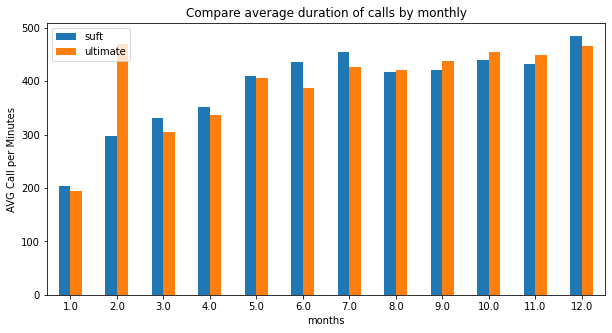

In [33]:
#bar plot comparison
ax = calls_all.plot( kind='bar',title='Compare average duration of calls by monthly',xlabel='months',ylabel='AVG Call per Minutes',rot=0,figsize=(10,5))

plt.show()

In [34]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
num_mint_surf = df_call_message[df_call_message['plan'] == 'surf'].groupby('month')['duration'].sum()
num_mint_ultimate = df_call_message[df_call_message['plan'] == 'ultimate'].groupby('month')['duration'].sum()
num_mint_all = pd.concat({'suft':call_surf,'ultimate':call_ultimate}, axis=1)
display(num_mint_all)

,suft,ultimate
month,,
1.0,203.000000,193.500000
2.0,297.000000,470.333333
3.0,330.000000,304.250000
4.0,351.540000,336.857143
5.0,410.240000,406.241379
6.0,435.791667,387.444444
7.0,453.733333,427.067797
8.0,417.849057,421.436620
9.0,420.732984,437.511628


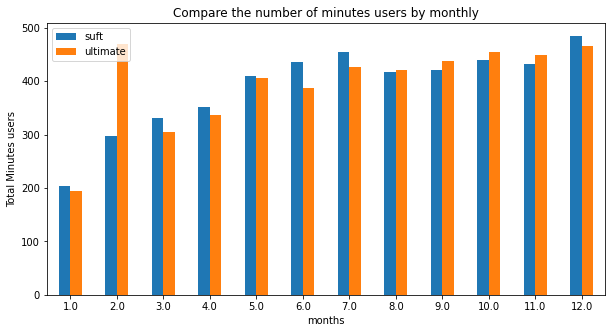

In [35]:
#bar plot comparison
ax = num_mint_all.plot( kind='bar',title='Compare the number of minutes users by monthly',xlabel='months',ylabel='Total Minutes users',rot=0,figsize=(10,5))

plt.show()

Based on the previous calculation, we could analyze the call duration by month and compare between both plans.
Starting to split both plans, split them by month and calculate the average for each month.

Plot comparison using bar plot, on the most month they are similar average for both plans.

Compare the number of minutes by each plan for the month period, the bar plot shows a similar plot like average minutes. a 6 month surf plan is more than ultimate.


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [36]:
# Calculate the mean and the variance of the monthly call duration
call_duration_mean = df_call_message.groupby('month')['duration'].mean()
call_duration_variance = df_call_message.groupby('month')['duration'].var()
call_duration_STD = df_call_message.groupby('month')['duration'].std()
display(pd.concat({'mean':call_duration_mean,'variance':call_duration_variance, 'STD':call_duration_STD}, axis=1))

,mean,variance,STD
month,,,
1.0,196.666667,13135.866667,114.611809
2.0,366.333333,56978.380952,238.701447
3.0,321.171429,43378.499160,208.275056
4.0,347.197183,45620.531992,213.589635
5.0,409.125000,52828.673544,229.844890
6.0,420.361702,42344.746809,205.778392
7.0,444.944134,63782.244052,252.551468
8.0,418.956522,52363.369280,228.830438
9.0,425.942238,48325.605347,219.830856


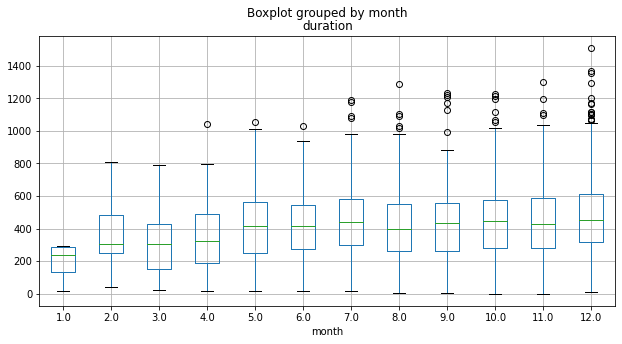

In [37]:
# Plot a boxplot to visualize the distribution of the monthly call duration

df_call_message.boxplot(by='month', column=['duration'], figsize=(10,5))

plt.show()

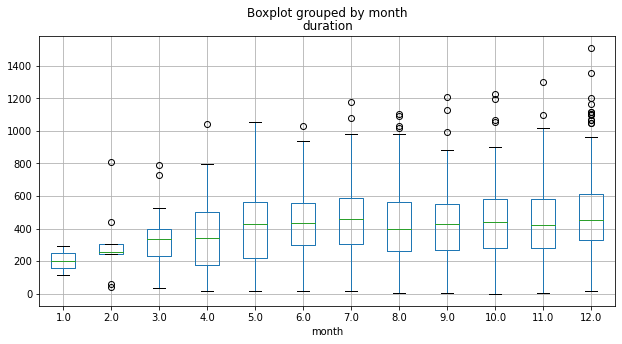

In [38]:
# Plot a boxplot to visualize the distribution of the monthly call duration for surf plan

df_call_message[df_call_message['plan'] == 'surf'].boxplot(by='month', column=['duration'],figsize=(10,5))

plt.show()

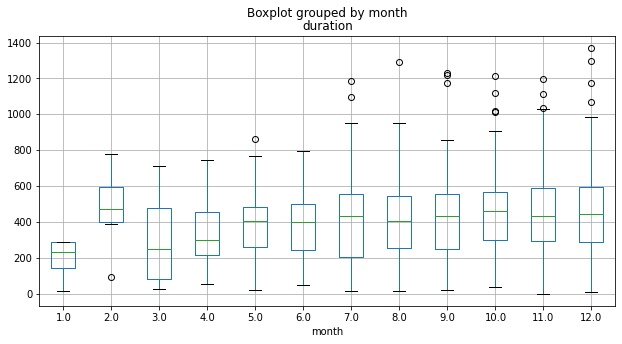

In [39]:
# Plot a boxplot to visualize the distribution of the monthly call duration for ultimate plan

df_call_message[df_call_message['plan'] == 'ultimate'].boxplot(by='month', column=['duration'],figsize=(10,5))

plt.show()

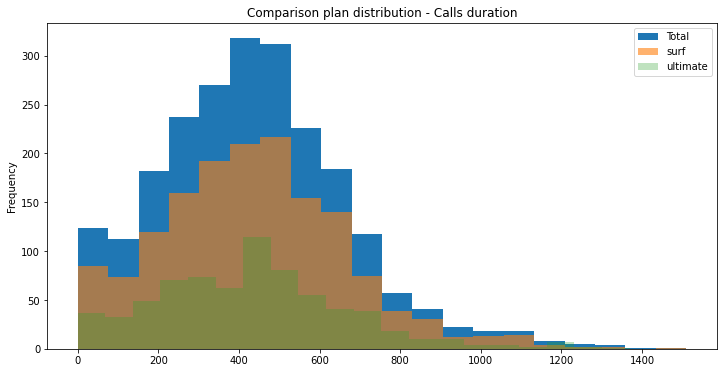

In [40]:
# Plot histograms. Describe the distributions.
df_call_message['duration'].plot(kind='hist', bins=20, title='Comparison plan distribution - Calls duration',
                                 figsize=(12,6))

df_call_message[df_call_message['plan'] == 'surf']['duration'].plot(kind='hist', bins=20, alpha=.6)
df_call_message[df_call_message['plan'] == 'ultimate']['duration'].plot(kind='hist', bins=20, alpha=.3)
plt.legend(['Total','surf','ultimate' ])
plt.show()

the distribution plot used histogram with bins=20, indicated a dimilar distribution with skewed to right, and the average are similar between both plans.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

In [41]:
# Compare the number of messages users of each plan tend to send each month
message_surf = df_call_message[df_call_message['plan'] == 'surf'].groupby('month')['id'].sum()
message_ultimate = df_call_message[df_call_message['plan'] == 'ultimate'].groupby('month')['id'].sum()
messages_all = pd.concat({'surf':message_surf,'ultimate':message_ultimate},axis=1)
display(messages_all)
#Check for month 8th
print(df_call_message[(df_call_message['plan'] == 'ultimate') & (df_call_message['month'] == 8)]['id'].sum())

,surf,ultimate
month,,
1.0,21.0,62.0
2.0,108.0,151.0
3.0,351.0,243.0
4.0,870.0,463.0
5.0,1849.0,931.0
6.0,2454.0,1379.0
7.0,3271.0,1937.0
8.0,4662.0,2732.0
9.0,5968.0,3259.0


2732.0


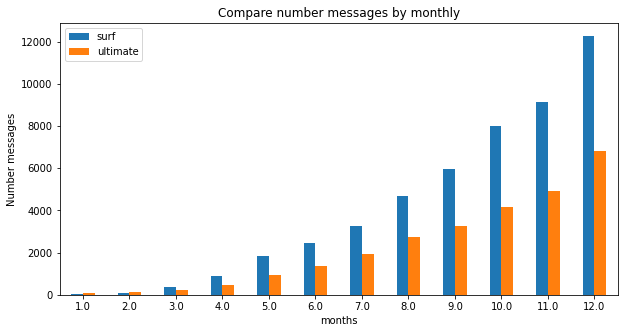

In [42]:
ax = messages_all.plot( kind='bar',title='Compare number messages by monthly',xlabel='months',ylabel='Number messages',rot=0,figsize=(10,5))

plt.show()



In [43]:
# Calculate the mean and the variance of the monthly call duration
message_duration_mean = df_call_message.groupby('month')['id'].mean()
message_duration_variance = df_call_message.groupby('month')['id'].var()
message_duration_STD = df_call_message.groupby('month')['id'].std()
display(pd.concat({'mean':message_duration_mean,'variance':message_duration_variance, 'STD':message_duration_STD}, axis=1))

,mean,variance,STD
month,,,
1.0,20.750000,206.916667,14.384598
2.0,23.545455,441.272727,21.006493
3.0,25.826087,443.604743,21.061926
4.0,25.634615,522.275641,22.853351
5.0,36.103896,981.989064,31.336705
6.0,34.531532,886.069451,29.766919
7.0,37.739130,890.880355,29.847619
8.0,40.850829,1037.405402,32.208778
9.0,41.563063,935.106865,30.579517


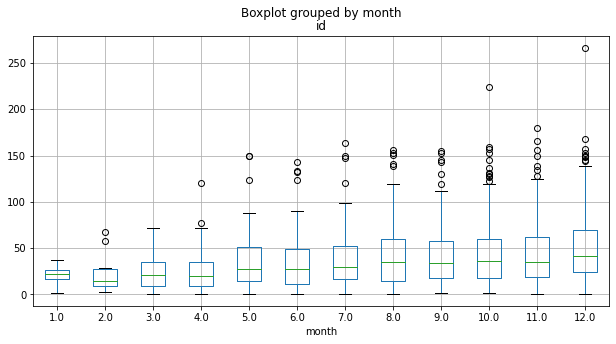

In [44]:
# Plot a boxplot to visualize the distribution of the monthly number messages

df_call_message.boxplot(by='month', column=['id'], figsize=(10,5))

plt.show()

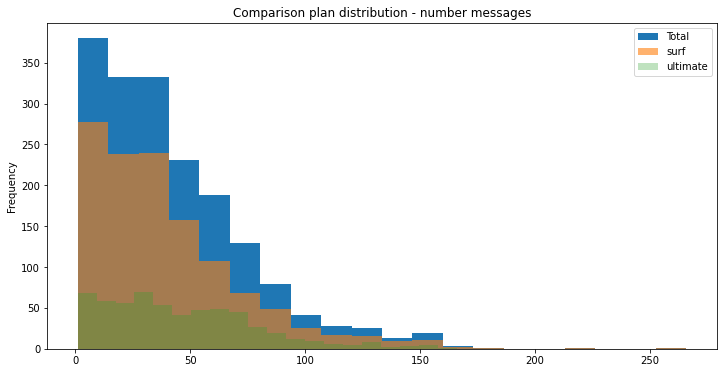

In [45]:
# Plot histograms. Describe the distributions.
df_call_message['id'].plot(kind='hist', bins=20, title='Comparison plan distribution - number messages',
                                 figsize=(12,6))

df_call_message[df_call_message['plan'] == 'surf']['id'].plot(kind='hist', bins=20, alpha=.6)
df_call_message[df_call_message['plan'] == 'ultimate']['id'].plot(kind='hist', bins=20, alpha=.3)
plt.legend(['Total','surf','ultimate' ])
plt.show()

The data distribution indicates the dataset for both plans are skewed to the right, and the performance is similar.


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

In [46]:
# Compare the amount of internet traffic consumed by users per plan
internet_surf = df_call_message[df_call_message['plan'] == 'surf'].groupby('month')['gb_used'].sum()
internet_ultimate = df_call_message[df_call_message['plan'] == 'ultimate'].groupby('month')['gb_used'].sum()
total_internet = pd.concat({'surf':internet_surf,'ultimate':internet_ultimate},axis=1)
display(total_internet)

,surf,ultimate
month,,
1.0,28.0,61.0
2.0,270.0,278.0
3.0,719.0,483.0
4.0,1444.0,807.0
5.0,2606.0,1140.0
6.0,3639.0,1685.0
7.0,4872.0,2339.0
8.0,6525.0,3026.0
9.0,7803.0,3480.0


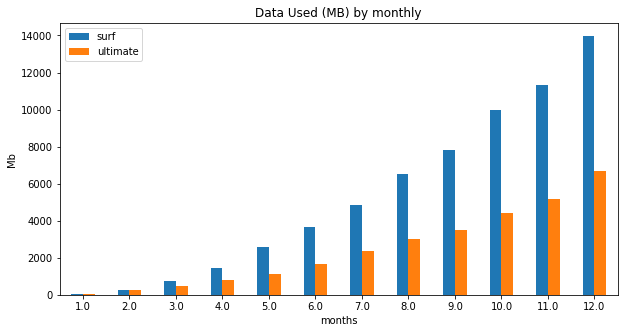

In [47]:
ax = total_internet.plot( kind='bar',title='Data Used (MB) by monthly',xlabel='months',ylabel='Mb',rot=0,figsize=(10,5))

plt.show()

In [48]:
# Calculate the mean and the variance of the monthly df_call_message['gb_used'] 
internet_duration_mean = df_call_message.groupby('month')['gb_used'].mean()
internet_duration_variance = df_call_message.groupby('month')['gb_used'].var()
internet_duration_STD = df_call_message.groupby('month')['gb_used'].std()
display(pd.concat({'mean':internet_duration_mean,'variance':internet_duration_variance, 'STD':internet_duration_STD}, axis=1))

,mean,variance,STD
month,,,
1.0,14.833333,61.366667,7.833688
2.0,34.250000,297.000000,17.233688
3.0,34.342857,456.467227,21.365094
4.0,32.157143,353.931470,18.813066
5.0,35.676190,291.682601,17.078718
6.0,37.492958,248.719808,15.770853
7.0,40.284916,303.620614,17.424713
8.0,41.526087,315.481849,17.761809
9.0,40.440860,235.556742,15.347858


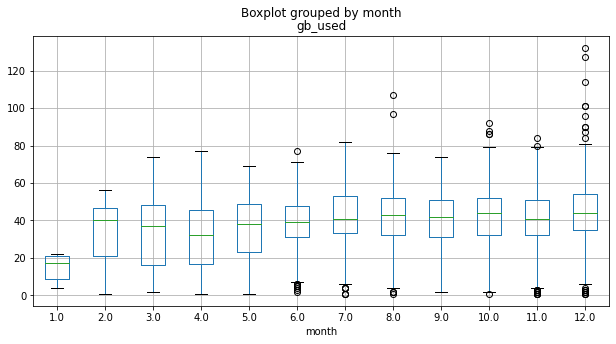

In [49]:
# Plot a boxplot to visualize the distribution of the monthly Gb used

df_call_message.boxplot(by='month', column=['gb_used'], figsize=(10,5))

plt.show()

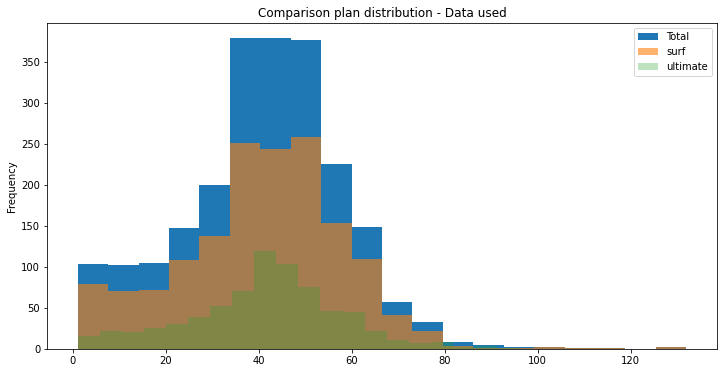

In [50]:
# Plot histograms. Describe the distributions.
df_call_message['gb_used'].plot(kind='hist', bins=20, title='Comparison plan distribution - Data used',
                                 figsize=(12,6))

df_call_message[df_call_message['plan'] == 'surf']['gb_used'].plot(kind='hist', bins=20, alpha=.6)
df_call_message[df_call_message['plan'] == 'ultimate']['gb_used'].plot(kind='hist', bins=20, alpha=.3)
plt.legend(['Total','surf','ultimate' ])
plt.show()

The distribution analysis indicates a symmetrical distribution between booths plans.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [51]:
# Compare the amount of internet traffic consumed by users per plan
revenue_surf_mean = df_call_message[df_call_message['plan'] == 'surf'].groupby('month')['revenue'].mean()
revenue_ultimate_mean = df_call_message[df_call_message['plan'] == 'ultimate'].groupby('month')['revenue'].mean()
AVG_revenue = pd.concat({'surf':revenue_surf_mean,'ultimate':revenue_ultimate_mean},axis=1)
display(AVG_revenue)

,surf,ultimate
month,,
1.0,50.000000,70.000000
2.0,187.730000,164.000000
3.0,206.810870,189.000000
4.0,181.910600,161.333333
5.0,225.810000,156.655172
6.0,256.389691,145.510638
7.0,285.236033,163.254237
8.0,285.474383,174.605634
9.0,280.281804,157.825581


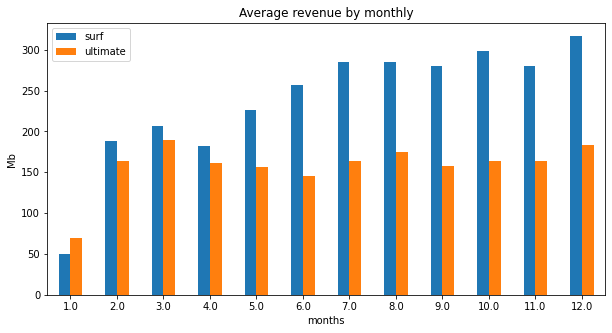

In [52]:
ax = AVG_revenue.plot( kind='bar',title='Average revenue by monthly',xlabel='months',ylabel='Mb',rot=0,figsize=(10,5))

plt.show()

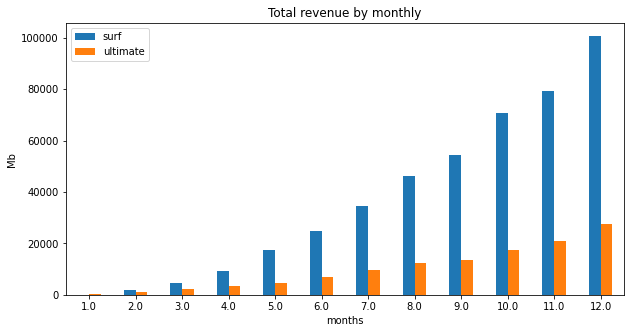

In [53]:
# Compare the amount of internet traffic consumed by users per plan
revenue_surf = df_call_message[df_call_message['plan'] == 'surf'].groupby('month')['revenue'].sum()
revenue_ultimate = df_call_message[df_call_message['plan'] == 'ultimate'].groupby('month')['revenue'].sum()
total_revenue = pd.concat({'surf':revenue_surf,'ultimate':revenue_ultimate},axis=1)

ax = total_revenue.plot( kind='bar',title='Total revenue by monthly',xlabel='months',ylabel='Mb',rot=0,figsize=(10,5))
plt.show()

In [54]:
# Calculate the mean and the variance of the monthly revenue
internet_duration_mean = df_call_message.groupby('month')['revenue'].mean()
internet_duration_variance = df_call_message.groupby('month')['revenue'].var()
internet_duration_STD = df_call_message.groupby('month')['revenue'].std()
display(pd.concat({'mean':internet_duration_mean,'variance':internet_duration_variance, 'STD':internet_duration_STD}, axis=1))

,mean,variance,STD
month,,,
1.0,63.333333,466.666667,21.602469
2.0,177.348125,13613.364390,116.676323
3.0,200.704286,20652.489290,143.709740
4.0,175.824366,19692.697988,140.330674
5.0,206.890283,19955.268127,141.263117
6.0,220.200000,17706.444706,133.065565
7.0,245.253111,22300.997167,149.335184
8.0,251.690343,25853.534934,160.790345
9.0,242.670250,20200.853888,142.129708


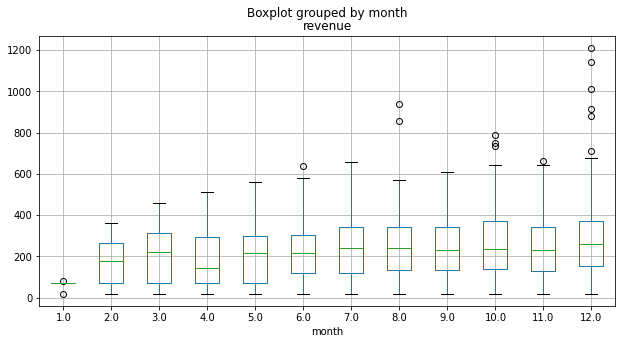

In [55]:
# Plot a boxplot to visualize the distribution of the monthly number messages

df_call_message.boxplot(by='month', column=['revenue'], figsize=(10,5))

plt.show()

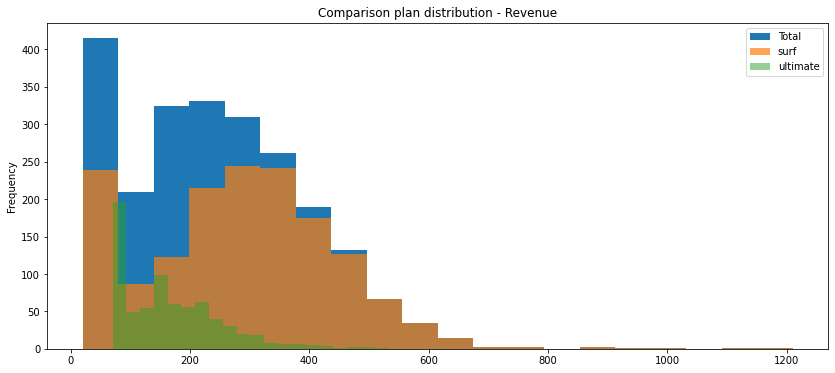

In [56]:
# Plot histograms. Describe the distributions.
binsize = 20
df_call_message['revenue'].plot(kind='hist', bins=binsize, title='Comparison plan distribution - Revenue',
                                 figsize=(14,6))

df_call_message[df_call_message['plan'] == 'surf']['revenue'].plot(kind='hist', bins=binsize, alpha=.7)
df_call_message[df_call_message['plan'] == 'ultimate']['revenue'].plot(kind='hist', bins=binsize, alpha=.5)
plt.legend(['Total','surf','ultimate' ])
plt.show()

the sckewed distribution indicate the surf plan have more revanue than ultimate plan.

In [57]:
# print the total year revenue by plan
print('total Revenue')
print(df_call_message[df_call_message['plan'] == 'surf']['revenue'].sum())
print(df_call_message[df_call_message['plan'] == 'ultimate']['revenue'].sum())
print(df_call_message[df_call_message['plan'] == 'surf']['revenue'].sum()/df_call_message['revenue'].sum())
print(df_call_message[df_call_message['plan'] == 'ultimate']['revenue'].sum()/df_call_message['revenue'].sum())
#Calls
print('total calls')
print(df_call_message[df_call_message['plan'] == 'surf']['duration'].sum())
print(df_call_message[df_call_message['plan'] == 'ultimate']['duration'].sum())
#messages
print('total messages')
print(df_call_message[df_call_message['plan'] == 'surf']['id'].sum())
print(df_call_message[df_call_message['plan'] == 'ultimate']['id'].sum())
#Data
print('total data Gb')
print(df_call_message[df_call_message['plan'] == 'surf']['gb_used'].sum())
print(df_call_message[df_call_message['plan'] == 'ultimate']['gb_used'].sum())

total Revenue
443891.18
120253.0
0.786839952864532
0.21316004713546813
total calls
674423.0
309924.0
total messages
49014.0
27037.0
total data Gb
63141.0
29578.0


60.5 percent of revenue of the year was for surf. and 39.5 for ultimate plan.
However, that ultimate plan is more expensive than the surf plan and gathers more revenue.


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualisation of the data. Great that you combined both plans on one graph for the comparison and also used different graph types to check available data.
-  If you have time and willing to practice, you can display two charts (histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

**Plan Test**
Test whether the means of two independent samples are significative different.
Assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.

selected the st.ttest_ind because is a tool to help compare the distribution of two population.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v3:</b>
    
Thank you for elaborating this part of the project. 

In [58]:
# Test the hypotheses
# gather the data by user.
user_revenue_surf = df_call_message[df_call_message['plan'] == 'surf'].groupby('user_id')['revenue'].mean()
user_revenue_ultimate = df_call_message[df_call_message['plan'] == 'ultimate'].groupby('user_id')['revenue'].mean()


In [59]:
alpha = 0.05
results = st.ttest_ind(user_revenue_surf, user_revenue_ultimate)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 4.903984324983135e-22
We reject the null hypothesis


We gather two dataset, and will compare the distribution differences between them, after hypothesis tests indicate both plans have the same behavior.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [60]:
# Test the hypotheses
# preprocessing, get state data for each user
# add data to summary df_call_message
df_users_part = df_users[['user_id', 'city']].copy()
df_users_part['state'] = df_users_part['city'].str[-6:-4]
display(df_users_part[:4])
display(df_users_part[df_users_part['state'] == 'TX'].count())
df_users_state_revenue = pd.merge(df_call_message,df_users_part[['user_id','state']], how='inner', on='user_id')
display(df_users_state_revenue[:5])

,user_id,city,state
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",GA
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",WA
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",NV
3,1003,"Tulsa, OK MSA",OK


user_id    39
city       39
state      39
dtype: int64

,user_id,month,duration,id,gb_used,plan,revenue,state
0,1000,12.0,124.0,11.0,4.0,ultimate,70.00,GA
1,1001,8.0,182.0,30.0,21.0,surf,80.00,WA
2,1001,9.0,315.0,44.0,41.0,surf,280.00,WA
3,1001,10.0,393.0,53.0,50.0,surf,370.09,WA
4,1001,11.0,426.0,36.0,49.0,surf,360.00,WA


In [61]:
# Test the hypotheses
# prepare the dataframes 
user_revenue_NY_NJ = df_users_state_revenue[(df_users_state_revenue['state'] == 'NY') | (df_users_state_revenue['state'] == 'NJ')].groupby('user_id')['revenue'].mean()
user_revenue_Other = df_users_state_revenue[~((df_users_state_revenue['state'] == 'NY') | (df_users_state_revenue['state'] == 'NJ'))].groupby('user_id')['revenue'].mean()
print(user_revenue_Other.shape)

(494,)


Region test by states t-test
Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.

selected the st.ttest_ind because is a tool to help compare the distribution of two population.

In [62]:
# function to test hypotesis

alpha = 0.05  # critical statistical significance level

results = st.ttest_ind(user_revenue_NY_NJ, user_revenue_Other)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    

p-value:  0.4305097858897964
We can't reject the null hypothesis


NY and NJ data set is small dataset just five register the other state are 388, however, we compare both dataset and we can't reject the null hypothesis.

to complete this task, requare to assign each user from where state is. for instant need to add state column to previous dataset. then gather the user from NY and other states.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

In [63]:
data = {
  "surf": [63851.49, 496518, 46598,19161],
  "ultimate": [41601,241768,26898,9754]
}

total_data = pd.DataFrame(data, index = ["revenue", "calls", "message","data Gb"])

display(total_data) 

,surf,ultimate
revenue,63851.49,41601
calls,496518.00,241768
message,46598.00,26898
data Gb,19161.00,9754


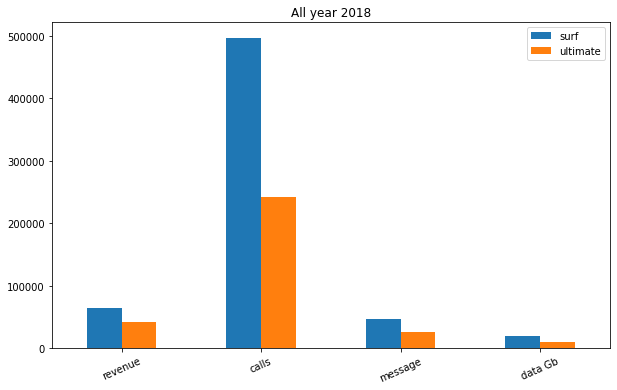

In [64]:
total_data.plot(kind='bar', title='All year 2018', rot=24, figsize=(10,6))

plt.show()

Overall, the final result indicates the ‘surf’ plan got more revenue and will be compared in the previous plot. For each product.

However, both have similar performances. 


<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusions. It is very structured and provides insights about what you accomplished and recommendations to the business.
    